In [2]:
!pip install missingno

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go

In [81]:
import warnings
warnings.filterwarnings('ignore')

In [82]:
main_df = pd.read_csv('netflix_titles.csv')

In [83]:
main_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [84]:
print(main_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB
None


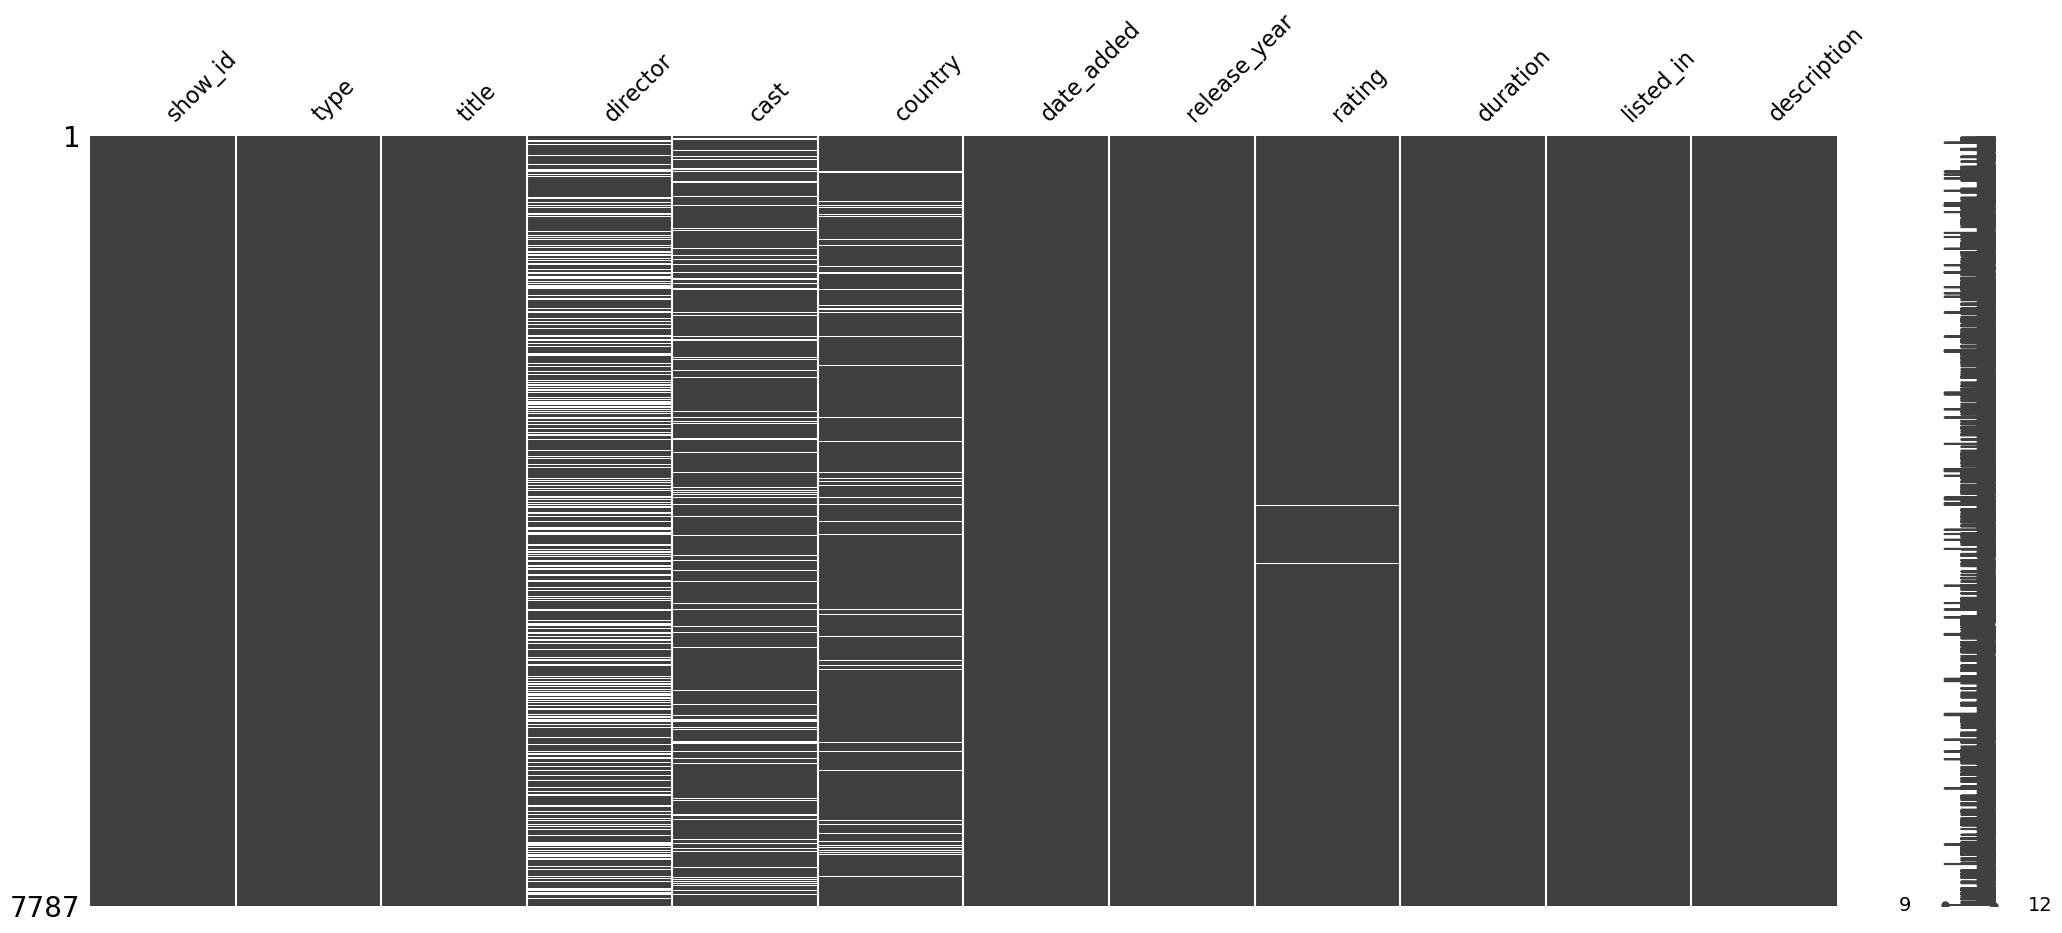

In [85]:
msno.matrix(main_df);

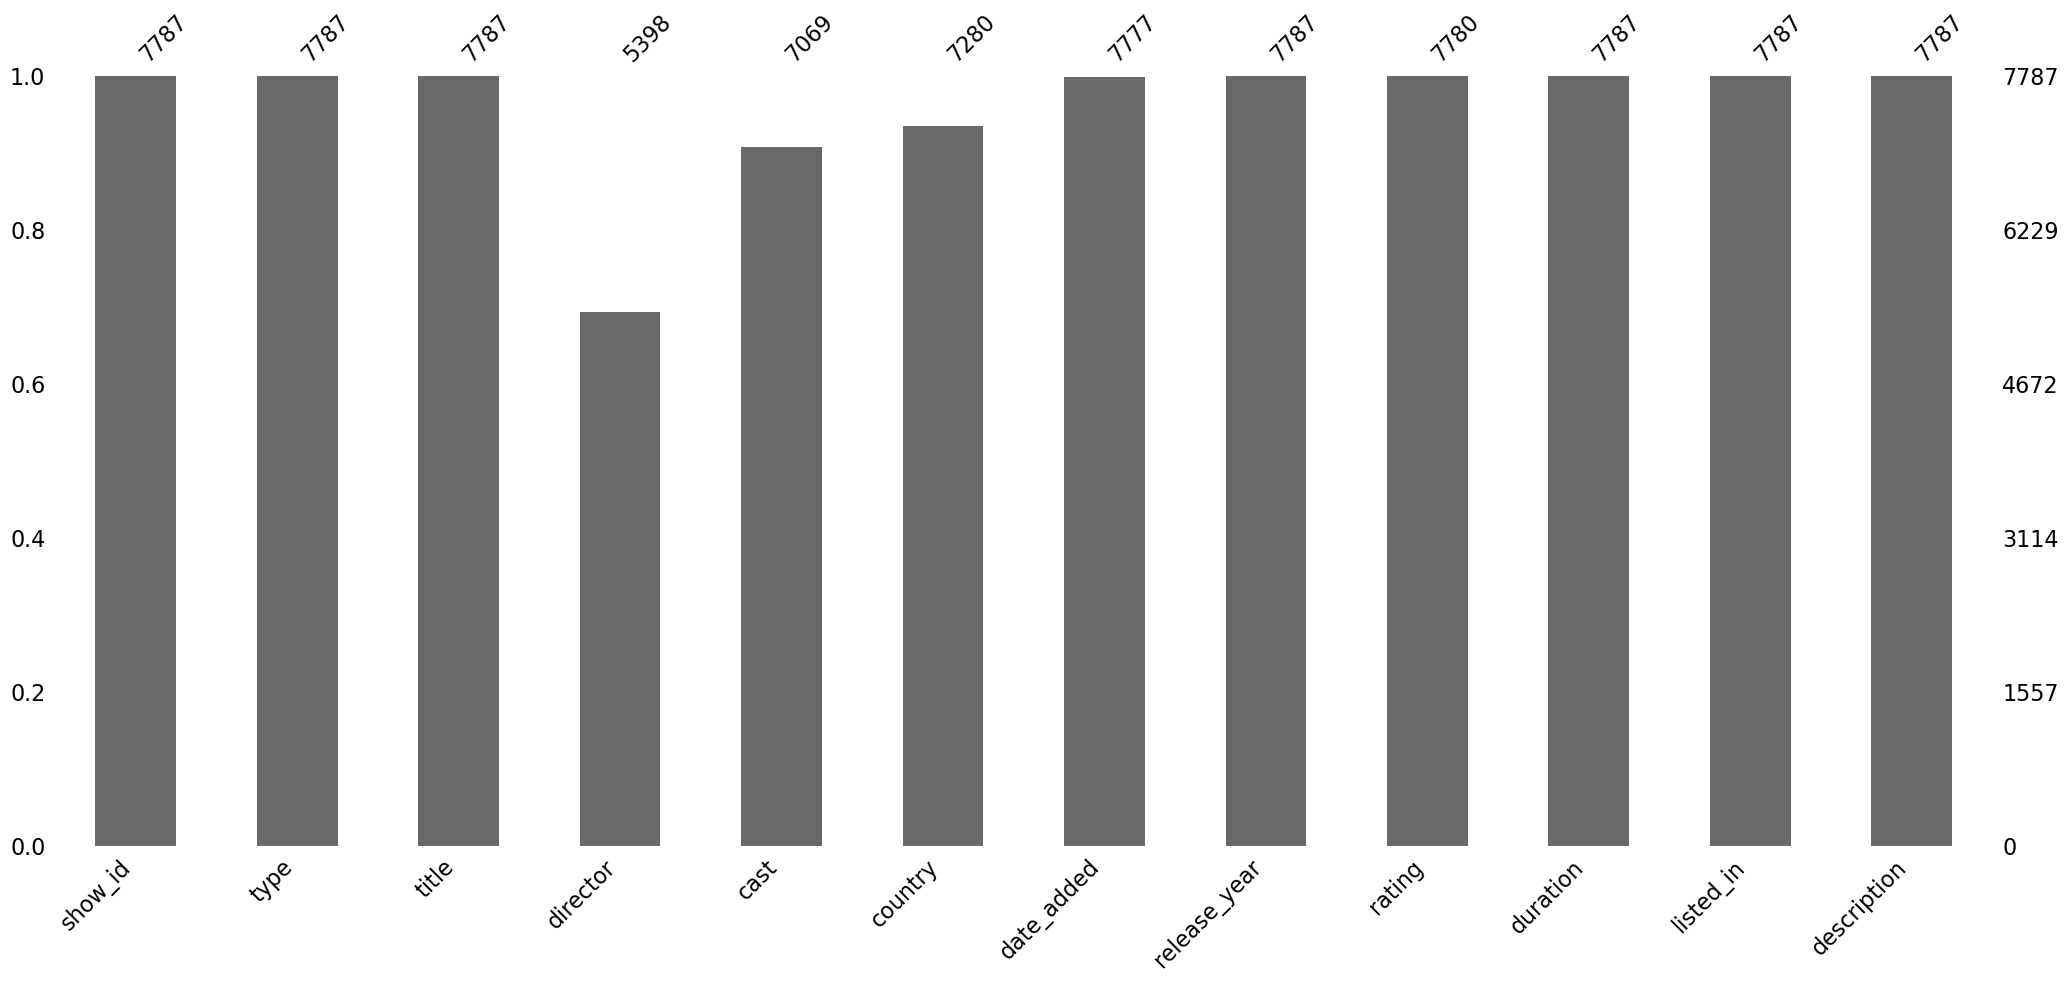

In [86]:
msno.bar(main_df);

In [87]:
for i in main_df.columns:
    null_rate = main_df[i].isna().sum() / len(main_df) * 100
    if null_rate > 0:
        print("{}'s null rate : {}%".format(i, round(null_rate,2)))

director's null rate : 30.68%
cast's null rate : 9.22%
country's null rate : 6.51%
date_added's null rate : 0.13%
rating's null rate : 0.09%


In [88]:
main_df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

In [89]:
main_df.duplicated().sum()

0

In [90]:
print(nf.shape)

(7787, 9)


In [91]:
nf = main_df.drop(['title', 'director','cast','description'], axis =1)

In [92]:
nf.columns

Index(['show_id', 'type', 'country', 'date_added', 'release_year', 'rating',
       'duration', 'listed_in'],
      dtype='object')

In [93]:
nf['country']  = nf['country'].fillna('unknown')
nf['country'].isnull().sum()

0

In [95]:
nf = nf.dropna().reset_index(drop=True)
nf.isnull().sum()

show_id         0
type            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [96]:
nf['country'].unique()

array(['Brazil', 'Mexico', 'Singapore', 'United States', 'Turkey',
       'Egypt', 'India', 'Poland, United States', 'Thailand', 'Nigeria',
       'unknown', 'Norway, Iceland, United States', 'United Kingdom',
       'Japan', 'South Korea', 'Italy', 'Canada', 'Indonesia', 'Romania',
       'Spain', 'Iceland', 'South Africa, Nigeria', 'France',
       'United States, South Africa', 'Portugal, Spain',
       'Hong Kong, China, Singapore', 'United States, Germany',
       'South Africa, China, United States', 'Argentina',
       'United States, France, Serbia', 'Germany',
       'Denmark, France, Poland', 'Poland', 'Kenya',
       'New Zealand, United Kingdom', 'Pakistan', 'Australia',
       'Australia, United States', 'Mexico, United States',
       'United States, China', 'China, Hong Kong', 'Taiwan',
       'United States, United Kingdom', 'France, South Korea, Japan',
       'United States, Canada', 'United Kingdom, United States',
       'Netherlands, Denmark, South Africa', 'Canada

In [99]:
nf['new_country'] = nf['country'].apply(lambda x: x.split(",")[0])

print(nf.shape)
nf.head()

(7770, 9)


,show_id,type,country,date_added,release_year,rating,duration,listed_in,new_country
0,s1,TV Show,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",Brazil
1,s2,Movie,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",Mexico
2,s3,Movie,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies",Singapore
3,s4,Movie,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",United States
4,s5,Movie,United States,"January 1, 2020",2008,PG-13,123 min,Dramas,United States


In [102]:
nf['year_added'] = nf['date_added'].apply(lambda x: x.split(' ')[-1])
nf['month_added'] = nf['date_added'].apply(lambda x: x.split(' ')[0])
nf.head()

,show_id,type,country,date_added,release_year,rating,duration,listed_in,new_country,year_added,month_added
0,s1,TV Show,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",Brazil,2020,August
1,s2,Movie,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",Mexico,2016,December
2,s3,Movie,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies",Singapore,2018,December
3,s4,Movie,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",United States,2017,November
4,s5,Movie,United States,"January 1, 2020",2008,PG-13,123 min,Dramas,United States,2020,January


In [104]:
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

nf['ratings_ages'] = nf['rating'].replace(ratings_ages)
nf['ratings_ages'].unique()

nf.head()

,show_id,type,country,date_added,release_year,rating,duration,listed_in,new_country,year_added,month_added,ratings_ages
0,s1,TV Show,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",Brazil,2020,August,Adults
1,s2,Movie,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",Mexico,2016,December,Adults
2,s3,Movie,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies",Singapore,2018,December,Adults
3,s4,Movie,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",United States,2017,November,Teens
4,s5,Movie,United States,"January 1, 2020",2008,PG-13,123 min,Dramas,United States,2020,January,Teens


In [109]:
nf['type'] = pd.Categorical(nf['type'])

nf['ratings_ages'] = pd.Categorical(nf['ratings_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])

nf['year_added'] = pd.to_numeric(nf['year_added'])

nf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7770 entries, 0 to 7769
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   show_id       7770 non-null   object  
 1   type          7770 non-null   category
 2   country       7770 non-null   object  
 3   date_added    7770 non-null   object  
 4   release_year  7770 non-null   int64   
 5   rating        7770 non-null   object  
 6   duration      7770 non-null   object  
 7   listed_in     7770 non-null   object  
 8   new_country   7770 non-null   object  
 9   year_added    7770 non-null   int64   
 10  month_added   7770 non-null   object  
 11  ratings_ages  7770 non-null   category
dtypes: category(2), int64(2), object(8)
memory usage: 622.7+ KB


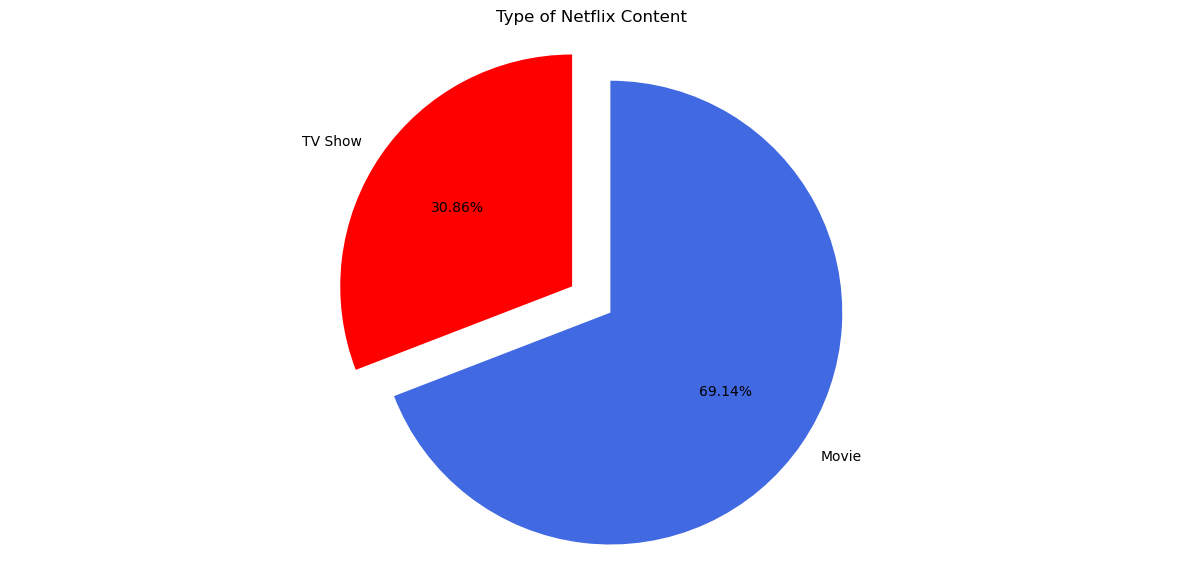

In [113]:
plt.figure(figsize = (15, 7))
labels = ['TV Show', 'Movie']
plt.pie(nf['type'].value_counts().sort_values(), labels=labels, explode=[0.1, 0.1],
       autopct = '%1.2f%%', colors= ['red','royalblue'], startangle = 90)
plt.title('Type of Netflix Content')
plt.axis('equal')
plt.show()

In [114]:
df_tv = nf[nf['type'] == 'TV Show']
df_movie = nf[nf['type'] == 'Movie']

In [115]:
movie_ratings = df_movies.groupby(['rating_ages'])['show_id'].count().reset_index(name='count').sort_values(by = 'count', ascending=False)

,show_id,type,country,date_added,release_year,rating,duration,listed_in,new_country,year_added,month_added,ratings_ages
0,s1,TV Show,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",Brazil,2020,August,Adults
5,s6,TV Show,Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",Turkey,2017,July,Adults
11,s12,TV Show,"Poland, United States","November 30, 2018",2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas",Poland,2018,November,Adults
12,s13,TV Show,Mexico,"May 17, 2019",2019,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...",Mexico,2019,May,Adults
16,s17,TV Show,unknown,"March 20, 2019",2018,TV-14,1 Season,"International TV Shows, TV Dramas",unknown,2019,March,Teens
...,...,...,...,...,...,...,...,...,...,...,...,...
7750,s7768,TV Show,Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...",Pakistan,2016,December,Older Kids
7758,s7776,TV Show,Japan,"August 14, 2020",2018,TV-Y7,1 Season,"Anime Series, Kids' TV",Japan,2020,August,Older Kids
7760,s7778,TV Show,unknown,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies",unknown,2019,July,Older Kids
7762,s7780,TV Show,Mexico,"November 26, 2019",2019,TV-MA,1 Season,"International TV Shows, Spanish-Language TV Sh...",Mexico,2019,November,Adults
